<a href="https://colab.research.google.com/github/eloyhernandezlua/MentalHealthProjectAI/blob/main/speechRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install speechbrain

     |████████████████████████████████| 358kB 2.1MB/s 
     |████████████████████████████████| 1.2MB 13.9MB/s 
     |████████████████████████████████| 1.9MB 18.2MB/s 
     |████████████████████████████████| 112kB 30.1MB/s 
     |████████████████████████████████| 645kB 23.4MB/s 
     |████████████████████████████████| 552kB 30.7MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
#!git clone https://huggingface.co/speechbrain/asr-transformer-transformerlm-librispeech

Cloning into 'asr-transformer-transformerlm-librispeech'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 98 (delta 54), reused 0 (delta 0)
Unpacking objects: 100% (98/98), done.


In [2]:
! pip install transformers

     |████████████████████████████████| 2.3MB 2.9MB/s 
     |████████████████████████████████| 3.3MB 23.4MB/s 
     |████████████████████████████████| 901kB 23.4MB/s 
  Found existing installation: huggingface-hub 0.0.9
    Uninstalling huggingface-hub-0.0.9:
      Successfully uninstalled huggingface-hub-0.0.9


In [3]:
!pip install pydub
!pip install librosa

In [4]:
import time
from time import perf_counter
import numpy as np
import matplotlib.pyplot as plt
import librosa
from pydub import AudioSegment
import os
from google.colab import files
import moviepy.editor
from transformers import pipeline


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)458752/45929032 bytes (1.0%)2080768/45929032 bytes (4.5%)4071424/45929032 bytes (8.9%)6455296/45929032 bytes (14.1%)9330688/45929032 bytes (20.3%)12509184/45929032 bytes (27.2%)15933440/45929032 bytes (34.7%)19283968/45929032 bytes (42.0%)22847488/45929032 bytes (49.7%)26157056/45929032 bytes (57.0%)29556736/45929032 bytes (64.4%)33030144/45929032 bytes (71.9%)36126720/

# **Importar Modelos**

###**Transformador**

In [ ]:
from speechbrain.pretrained import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-transformerlm-librispeech", savedir="pretrained_models/asr-crdnn-transformerlm-librispeech")

In [ ]:
from speechbrain.pretrained import TransformerASR

asr_model = TransformerASR.from_hparams(source="speechbrain/asr-transformer-transformerlm-librispeech", savedir="pretrained_models/asr-transformer-transformerlm-librispeech")


ImportError: ignored

###**RNN**

In [5]:
from speechbrain.pretrained import EncoderDecoderASR

asr_model2 = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-rnnlm-librispeech", savedir="pretrained_models/asr-crdnn-rnnlm-librispeech")

###**CRDNN**

In [ ]:
from speechbrain.pretrained import EncoderDecoderASR

asr_model3 = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-transformerlm-librispeech", savedir="pretrained_models/asr-crdnn-transformerlm-librispeech")

####Pruebas con Transformadores y diferentes formatos de audio

#TEXTO A PREDECIR:

### where are the articles in question when will he determine the answare george is going to determine the cost please determine the price of the dress she determines the total every hour he determines the results of the test linda determines that on a daily basis every was determine in the meeting we determine

Número de palabras: 53 
Velocidad de dictado: 120 wpm

30 s de audio formato .wav

In [ ]:


a = perf_counter();

res1 = asr_model.transcribe_file("/content/bg5kv-1s3th.wav")

b = perf_counter();

tiempo = (a-b)
print(tiempo)



-2755.650518368


In [ ]:
print(res1)

WHERE ARE THE ARTICLES IN QUESTION WHEN WILL HE DETERMINE THE ANSWER GEORGE IS GOING TO DETERMINE THE COST PLEASE DETERMINE THE PRICE OF THE DRESS HE DETERMINES THE TOTAL EVERY HOUR HE DETERMINES THE RESULTS OF THE TEST WHEN IT DETERMINES THAT ON A DAILY BASIS EVERYTHING WAS DETERMINED IN THE MEETING


##**Precisión:** 91.59% 
##**Tiempo de ejecución:** 45.92 min

30 s de audio formato .wav comprimido

In [ ]:
a = perf_counter();
res2 = asr_model.transcribe_file("/content/bg5kv-1s3th (1).wav")
b = perf_counter()
tiempo = (a-b)
print(tiempo)

#1hr 17 s

-2985.3827757539993


In [ ]:
print(res2)

WHERE ARE THE ARTICLES IN QUESTION WHEN WILL HE DETERMINE THE ANSWER GEORGE IS GOING TO DETERMINE THE COST PLEASE DETERMINE THE PRICE OF THE DRESS SHE DETERMINES THE TOTAL EVERY HOUR HE DETERMINES THE RESULTS OF THE TESS WHEN IT DETERMINES THAT ON A DAILY BASIS EVERYTHING WAS DETERMINED IN THE MEETING


##**Precisión:** 90.71% 
##**Tiempo de ejecución:** 49.75 min

30 s de audio formato .mp3

In [ ]:
a = perf_counter();
res3 = asr_model.transcribe_file("/content/t2wma-vlc4r.mp3")
b = perf_counter()
tiempo = (b-a)
print(tiempo)
#57 min

3053.7547148169997


In [ ]:
print(res3)

WHERE ARE THE ARTICLES IN QUESTION WHEN WILL HE DETERMINE THEE ANSWER GEORGE IS GOING TO DETERMINE THE COST PLEASE DETERMINE THE PRICES OF THE DRESS SHE DETERMINES THE TOTAL EVERY HOUR HE DETERMINES THE RESULTS OF THE TEST AND DETERMINES THAT ON A DATELY BASIS EVERYTHING WAS DETERMINED IN THEE MAY WE


##**Precisión:** 89.29% 
##**Tiempo de ejecución:** 50.89 min

30 s de audio formato .mp3 comprimido

In [ ]:
a = perf_counter();
res4 = asr_model.transcribe_file("/content/t2wma-vlc4r (1).mp3")
b = perf_counter()
tiempo = (b-a)
print(tiempo)

#57 min

3174.000178914999


In [ ]:
print(res4)

WHERE ARE THE ARTICLES IN QUESTION WHEN WILL HE DETERMINE THE ANSWER GEORGE IS GOING TO DETERMINE THE COST PLEASE DETERMINE THE PRICE OF THE DRESS SHE DETERMINES THE TOTAL EVERY HOUR HE DETERMINES THE RESULTS OF THE TEST AND DETERMINES THAT ON A DAILY BASIS EVERY THING WAS DETERMIN'D IN THEE MAY WE DETERMINE


##**Precisión:** 94.69% 
##**Tiempo de ejecución:** 52.9 min

### Pruebas con RNN y diferentes tipos formatos de audio


In [ ]:
a = perf_counter();

res1a = asr_model2.transcribe_file("/content/bg5kv-1s3th.wav")

b = perf_counter();

tiempo = (b-a)
print(tiempo)

68.96344690099977


In [ ]:
print(res1a)

WHERE ARE THE ARTICLES IN QUESTION WHEN WILL HE DETERMINE THEE ANSWER GEORGE'S GOING TO DETERMINE THEE COST PLEASE DETERMINE THE PRICE OF THE DRESS SHE DETERMINES THEE TOTAL EVERY HOUR HE DETERMINES THE RESULTS OF THE TEST LENDER DETERMINES THAT ON A DAILY BASIS EVERYTHING WAS DETERMINED IN THE MEETING WE DETERMINE


##**Precisión:** 96.29% 
##**Tiempo de ejecución:** 1.14 min

In [ ]:
a = perf_counter();

res2a = asr_model2.transcribe_file("/content/bg5kv-1s3th (1).wav")

b = perf_counter();

tiempo = (b-a)
print(tiempo)

73.94109927500176


In [ ]:
print(res2a)

WHERE ARE THE ARTICLES IN QUESTION WHEN WILL HE DETERMINE THEE ANSWER GEORGE IS GOING TO DECLARE THEE COST PLEASE DETERMINE THE PRICE OF THE DRESS SHE DETERMINES THEE TOTAL EVERY HOUR HE DETERMINES THE RESULTS OF THE TEST LENDER DETERMINED THAT ON A DAILY BASIS EVERYTHING WAS DETERMINED IN THE MEETING WE DETERMINE


##**Precisión:** 93.54% 
##**Tiempo de ejecución:** 1.23 min

In [ ]:
a = perf_counter();

res3a = asr_model2.transcribe_file("/content/t2wma-vlc4r.mp3")

b = perf_counter();

tiempo = (b-a)
print(tiempo)

528.2880898580006


In [ ]:
print(res3a)

WHERE ARE THE ARTICLES IN QUESTION WHEN WILL HE DETERMINE THEE ANSWER GEORGE IS GOING TO DECLARE THEE COST PLEASE DETERMINE THE PRICE OF THE DRESS SHE DETERMINES THEE TOTAL EVERY HOUR HE DETERMINES THE RESULTS OF THE TEST LINDA DETERMINED THAT ON A DAILY BASIS EVERYTHING WAS DETERMINED IN THE MEETING WE DETERMINE


##**Precisión:** 95.03% 
##**Tiempo de ejecución:** 8.80 min

In [ ]:
a = perf_counter();

res4a = asr_model2.transcribe_file("/content/t2wma-vlc4r (1).mp3")

b = perf_counter();

tiempo = (b-a)
print(tiempo)

131.32721231599862


In [ ]:
print(res4a)

WHERE ARE THE ARTICLES IN QUESTION WHEN WILL HE DETERMINE THEE ANSWER GEORGE'S GOING TO DETERMINE THEE COST PLEASE DETERMINE THE PRICE OF THE DRESS SHE DETERMINES THEE TOTAL EVERY HOUR HE DETERMINES THE RESULTS OF THE TEST LINDA DETERMINES THAT ON A DAILY BASIS EVERYTHING WAS DETERMINED IN THE MEETING WE DETERMINED


##**Precisión:** 97.49% 
##**Tiempo de ejecución:** 2.18 min

In [ ]:
time1 = [45.92, 49.75, 50.89, 52.9]
score1 = [91.59, 90.71, 89.29, 52.9]
time2 = [1.14,1.23, 8.80, 2.18]
score2 = [96.29, 93.54, 95.03, 97.49]
avgt1 = np.mean(time1)
avgt2 = np.mean(time2)
avgs1 = np.mean(score1)
avgs2 = np.mean(score2)


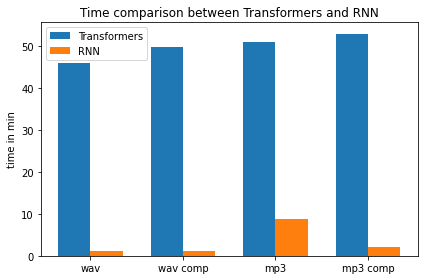

In [ ]:
labels = ['wav', 'wav comp', 'mp3', 'mp3 comp']

x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, time1, width, label='Transformers')
rects2 = ax.bar(x + width/2, time2, width, label='RNN')

ax.set_ylabel('time in min')
ax.set_xticks(x)
ax.set_title('Time comparison between Transformers and RNN')
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

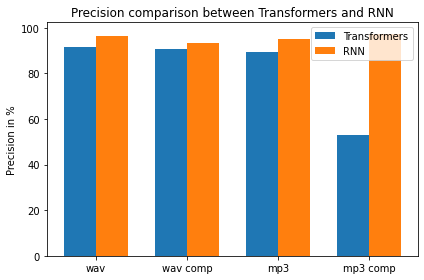

In [ ]:
labels = ['wav', 'wav comp', 'mp3', 'mp3 comp']

x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, score1, width, label='Transformers')
rects2 = ax.bar(x + width/2, score2, width, label='RNN')

ax.set_ylabel('Precision in %')
ax.set_xticks(x)
ax.set_title('Precision comparison between Transformers and RNN')
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

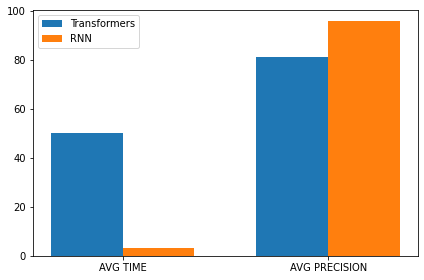

In [ ]:
labels = ['AVG TIME', 'AVG PRECISION']

x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots()

av1 = [avgt1, avgs1]
av2 = [avgt2, avgs2]
rects1 = ax.bar(x - width/2, av1, width, label='Transformers')
rects2 = ax.bar(x + width/2, av2, width, label='RNN')


ax.set_xticks(x)

ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

#**Conclusión:**
#####El tiempo que ambos modelos presentaron es considerablemente variable, siendo claramente más eficiente el usar la red neuronal recurente, mientras que la precisión deambos modelos es buena, sigue siendo superior también la red recurrente en este aspecto. En cuanto al formato de audio, no se nota una diferencia considerable por lo que resultaría óptimo trabajar con formatos .wav por su calidad de audio

####Pruebas con dictados a mayor velocidad

#TEXTO A PREDECIR:

### the house was an absolute mess what is an absolute number they had absolute proof of the crime are you absolutely sure about that he was absolutely in favour of the movement coceded that it was absolutely true philosophers don't believe in absolutes politics do not deal in absolutes death is one of the absolutes of life the papers are all here except for that one everyone left except marylyn the houses are well kept except that one the sales tax law accepts food purchases the cost of the tour except children the parking lot except the handicapped the law accepted seeing aye dogs the admission price except the children the new rule accepted seniors is the school accepting the alumni the rule is accepting them from the text we are accepting out of date tickets he took exception to everything I said they did not make an exception for me will you make just one exception the exceptions will fill volumes the record was full of exceptions the law had far too many exceptions she has exceptional talent david showed 

Archivo: cr41k-jq44u.wav
Número de palabras: 182 
Velocidad de dictado: 230+ wpm

Prueba con 230+ wpm con rnn - 1 min audio

In [ ]:
a = perf_counter();

res230_1 = asr_model2.transcribe_file("/content/cr41k-jq44u.wav")

b = perf_counter();

tiempo = (b-a)
print(tiempo)
print(res230_1)

396.41389511499995
THAT HE WAS ABSOLUTELY IN FAVOUR OF THE MOVEMENT CONCEDED THAT IT WAS ABSOLUTELY TRUE PHILOSOPHER DON'T BELIEVE IN ABSOLUTES POLITICS DOES NOT DEAL IN ABSOLUTES DEATH IS ONE OF THE ABSOLUTES OF LIFE THE PAPERS ARE ALL HERE EXCEPT THAT ONE EVERYONE MUST ACCEPT MARYLAND THE HOUSES ARE WELL KEPT EXCEPT THAT ONE THE SALES TAXWELL ACCEPTS FOOD PURCHASES THE COSTS OF THE TOUR EXCEPT CHILTERN THE PARKING LAW ACCEPTS THE HANDICAPPED THE LAW ACCEPTED SEEING AYE DOGS THE ADMISSION PRICE ACCEPTED CHILDREN THE NEW RULE ACCEPTED SENIORS IS THE SCHOOL EXCEPTING THE ELEVENTH THE RULE IS ACCEPTING THEM FROM THE TEXT WE ARE ACCEPTING OUT OF DATE TICKETS HE TOOK EXCEPTION TO EVERYTHING I SAID THEY DID NOT MAKE AN EXCEPTION FOR ME WILL YOU MAKE JUST ONE EXCEPTION THE EXCEPTIONS WOULD FILL VOLUMES THE RECORD WAS FULL OF EXCEPTIONS THE LAW HAD FAR TOO MANY EXCEPTIONS SHE HAS EXCEPTIONAL TALENT DAVID SHOWED EXCELLENT


##**Precisión:** 79.37% 
##**Tiempo de ejecución:** 6.60 min

230+ wpm - 30 seg

#TEXTO A PREDECIR:

### the house was an absolute mess what is an absolute number they had absolute proof of the crime are you absolutely sure about that he was absolutely in favour of the movement coceded that it was absolutely true philosophers don't believe in absolutes politics do not deal in absolutes death is one of the absolutes of life the papers are all here except for that one everyone left except marylyn the houses are well kept except that one the sales tax law accepts food purchases the cost of the tour except children

Archivo: wsnjq-hwhxf.wav
Número de palabras: 93 
Velocidad de dictado: 230+ wpm

In [ ]:
a = perf_counter();

res230_2 = asr_model2.transcribe_file("/content/wsnjq-hwhxf.wav")

b = perf_counter();

tiempo = (b-a)
print(tiempo)
print(res230_2)

99.77580731700004
HE WAS ABSOLUTELY IN FAVOUR OF THE MOVE CAN CONCEDED THAT IT WAS ABSOLUTELY TRUE PHILOSOPHERS DON'T BELIEVE IN ABSOLUTES POLITICS DOES NOT DEAL IN ABSOLUTES DEATH IS ONE OF THE ABSOLUTES OF LIFE THE PAPERS ARE ALL HERE EXCEPT THAT ONE EVERYONE LEFT EXCEPT MARYLAND THE HOUSES ARE WELL KEPT EXCEPT THAT ONE THE SALES TAXWELL ACCEPTS FOOD PURCHASES THE COSTS OF THE TOUR EXCEPT CHILDREN


##**Precisión:** 70.29% 
##**Tiempo de ejecución:** 1.66 min

200 wpm - 30 seg

#TEXTO A PREDECIR:

### the minimum number of envelopes is eight did you take notice of his success did you succeed in getting the minimum number of notices in the envelope i noticed that his successful entry had the minimum number of words i noticed that she is enjoying many successes we succeeded in our marketing plan because we used bright red envelopes we are trying to fit all of our puzzle pieces together in a logical manner it is just as if you are building a puzzle by refering  

Archivo: 49m2a-kddi3.wav
Número de palabras: 86 
Velocidad de dictado: 200 wpm

In [ ]:
a = perf_counter();

res200_1 = asr_model2.transcribe_file("/content/49m2a-kddi3.wav")

b = perf_counter();

tiempo = (b-a)
print(tiempo)
print(res200_1)

112.81254672799992
THE MINIMUM NUMBER OF ENVELOPES IS EIGHT DID YOU TAKE NOTICE OF HIS SUCCESS DID YOU SUCCEED IN GETTING THE MINIMUM NUMBERS OF NOTICES IN THE ENVELOPE I NOTICED THAT HIS SUCCESSFUL ENTRY HAD THE MINIMUM NUMBER OF WORDS I NOTICED THAT SHE IS ENJOYING MANY SUCCESSES WE SUCCEEDED IN OUR MARKETING CLAIM BECAUSE WE USED BRIGHT RED ENVELOPES WE ARE TRYING TO FIT ALL OF OUR PUZZLE PIECES TOGETHER IN A LOGICAL MANNER IT IS JUST AS IF YOU ARE BUILDING A PUZZLE BY REFERRING TO THEE


##**Precisión:** 96.46% 
##**Tiempo de ejecución:** 1.88 min

200 wpm - 30 seg Transformers

In [ ]:
a = perf_counter();

rest1 = asr_model.transcribe_file("/content/49m2a-kddi3.wav")

b = perf_counter();

tiempo = (b-a)
print(tiempo)
print(rest1)

1751.0130511220004


NameError: ignored

In [ ]:
print(rest1)

MINIMUM NUMBER OF ENVELOPES EIGHT DID YOU TAKE NOTICE OF HIS SUCCESS DID YOU SUCCEED IN GETTING THE IMMENSIMAL NUMBER OF NOTICES IN THE ENVELOPE I NOTICED THAT HIS SUCCESSFUL ENTRY HAD THE INIMITABLE NUMBER OF WORDS I NOTICED THAT SHE IS ENJOYING MANY SUCCESSES WE SUCCEEDED IN OUR MARKING TIME BECAUSE WE USE THE BRIGHT RED ENVELOPES WE ARE TRYING TO FIT ALL OF OUR PUZZLE PIECES TOGETHER IN A LOGICAL MANNER IT IS JUST AS IF YOU ARE BUILDING A PUZZLE BY REFERRING TO THEE


##**Precisión:** 88.38% 
##**Tiempo de ejecución:** 29.18 min

Pruebas de tiempo RNN

2 min audio

#TEXTO A PREDECIR:

### absolute mess what is an absolute number they had absolute proof of the crime are you absolutely sure about that he was absolutely in favour of the movement coceded that it was absolutely true philosophers don't believe in absolutes politics do not deal in absolutes death is one of the absolutes of life the papers are all here except for that one everyone left except marylyn the houses are well kept except that one the sales tax law accepts food purchases the cost of the tour except children the parking lot except the handicapped the law accepted seeing aye dogs the admission price except the children the new rule accepted seniors is the school accepting the alumni the rule is accepting them from the text we are accepting out of date tickets he took exception to everything I said they did not make an exception for me will you make just one exception the exceptions will fill volumes the record was full of exceptions the law had far too many exceptions she has exceptional talent david showed exeptional skill that paper was really exeptional he is doing exceptionally well Linda is exeptionally gifted I am exeptionally tired tonight that man is our next door neighbor my neighbor borrowed the lawn mower I really don´t know my neighbor Mr. and Ms. Jones are our neighbours our neighbours have two big dogs those people are new are the new neighbours we just move to the neighbourhood we are planning a neighbourhood party she lives in the <> of neighbourhood there is a shed on the librarian lot that section is the librarian area we have a neighbouring property that little boy played with the train she was more than a little surprised mary brought the little dog home a cute kitten has an accute case of cat fever please mark a cross on the drawing to show where she want to cross the street they reachead an accord on the price of acorded wood he is awared and can not expend his word Fred bought a side of beef and set it aside for the winner I asure you that fleet lady in the fith grade she is a sure thing he wanted to buy a ford convertible but he couldn't afford it 

Archivo: sz9hi-m683f.wav
Número de palabras: 382 
Velocidad de dictado: 230+ wpm

In [ ]:
a = perf_counter();

rest6 = asr_model2.transcribe_file("/content/sz9hi-m683f.wav")

b = perf_counter();

tiempo = (b-a)
print(tiempo)
print(rest6)

668.51569079
HE WAS ABSURDLY IN FAMILIAR OF THE MOVE CAN CONCLUDED THAT IT WAS ABSURDLY TRUE PHOTIOPE AND FINISHED THAT IT WAS ACCIDENTALLY TRUE PHOTIS'S TASK'S TASK'S TASK'S IT'S ONE OF THE ACCIDENTS OF LIFE THE PAPERS ARE ALL HERE EXCEPT THAT ONE EVERY ONE LEFT EXCEPT MARYLAND THE HOUSES ARE WELL KEPT EXCEPT THAT ONE THE SALES TAXWELL ACCEPTS FRUIT PURCHASES THE COSTS OF THE TOUR EXCEPT CHILTERN THE PARKING LAW ACCEPTS THE HANDICAP THE LAW ACCEPTED SEEING AYE DOGS THE ADVERSARY PRICE ACCEPTED CHILDREN THE NEW RULE ACCEPTED SYNONYMS IS THE SCHOOL EXCEPTING THE ALUMNI THE RULE IS ACCEPTING THEM FROM THE TEXT WE ARE ACCEPTING OUT OF THESE TICKETS HE TOOK EXCEPTION TO EVERYTHING I SAID THEY DID NOT MAKE AN EXCEPTION FOR ME WILL YOU MAKE JUST ONE EXCEPTION THE EXCEPTIONS WOULD FILL VOLUMES THE RECORD WAS FULL OF EXCEPTIONS THE LAW HAD FAR TOO MANY EXCEPTIONS SHE HAS EXCEPTIONAL TALENT DAVID SHOWED EXCEPTIONAL SKILL THAT PAPER WAS REALLY EXCEPTIONAL HE IS DOING EXCEPTIONALLY WELL LYNDE IS 

##**Precisión:** 34.64% 
##**Tiempo de ejecución:** 11.14 min

3min

In [ ]:
a = perf_counter();

rest7 = asr_model2.transcribe_file("/content/es0ya-g1pdz.wav")

b = perf_counter();

tiempo = (b-a)
print(tiempo)
print(rest7)

735.1220505899983
NOT FOR BUT WERE WERE WERE WERE WERE WERE WERE WERE WERE WERE WERE WERE WERE WERE WEREON FOR BUT WERE WERE WEREONENENENENENENENENENENENENENENENEN FOR BUT WERE WERE WERE WEREONENEN BUT WERE WEREONENEN FOR BUT WERE WEREONENEN BUT WERE WEREONENENENENENENENENENENENEN FOR BUT WERE WERE WERE WEREONENEN BUT WERE WEREONENENENENENEN BUT WERE WEREONENENENENEN BUT WERE WEREONENENENENEN BUT WERE WEREONENENENENEN BUT WERE WEREONENENENENEN BUT WERE WEREONENENENENEN BUT WERE WEREONEN WITHENENENENEN WITHENENEN WITHENENEN WITHENENEN WITHENENEN WITHENENEN WITHENENEN WITHENENEN WITHENENEN WITHENENEN WITHENENEN WITHENENEN WITHENENEN WITHENENEN WITHENENEN WITHENENEN WITHENENEN WITHENENEN WITHENENEN WITHENENEN WITHENENEN WITHENEN WITHENEN WITHENEN WITHENEN WITHENEN WITHENEN WITHENEN


##**Precisión:** 0% 
##**Tiempo de ejecución:** 12.25 min

3:30 min

In [ ]:
a = perf_counter();

rest8 = asr_model2.transcribe_file("/content/s2tm3-e9abs.wav")

b = perf_counter();

tiempo = (b-a)
print(tiempo)
print(rest8)

669.3338279159998
NOT FOR BUT WERE WERE WERE WERE WERE WERE WERE WERE WERE WERE WERE WERE WERE WERE WERE WEREONENENENENENENENENENENENENENENENENENEN FOR BUT WERE WERE WERE WEREONENENENENENENENENENENENENENENENENEN FOR BUT WERE WERE WERE WEREONENENENENENENENENENENENENENENEN FOR BUT WERE WERE WERE WEREONENENENENENENENENENENENENEN FOR BUT WERE WERE WERE WEREIT FOR ONENY FOR BUT WERE WERE WERE WEREONENENENENEN WITH FOR FOR BUT WERE WERE WEREITCE WITH FORAL C BUTON FOR F ASCEAEN FOR FIT ASCE FOREN BUT WERE WERE WERE WERE WERE WERE WERE WEREF FON BUTPEN BUT THATA AS BUTON BUTP BUTD ASA BUTON FOR F WEREON FOR FIT ASCE FOREN BUT WERE


##**Precisión:** 0% 
##**Tiempo de ejecución:** 11.15 min

4 min

In [ ]:
a = perf_counter();

rest9 = asr_model2.transcribe_file("/content/zbamv-rvm36.wav")

b = perf_counter();

tiempo = (b-a)
print(tiempo)
print(rest9)

818.4136504369999
NOT FOR BUT WERE WERE WERE NOTAENENENENEN FOR BUT WERE WERE WEREIT FOR ON FOR FORTH FOR BUT WERE WEREONENENENENENENENENENENENENENEN FOR BUT WERE WERE WERE WEREIT FOR ON FOR FORTH C BUT THATA HADN BUT WEREITCE YOU ASTH AS ASTH ASTH AS AS NOTACFTH BE ASTH AS ASTH ASTH ASTH ASTH AS AS AS NOTCE PTH AS AS AS BUT ASTH ASTH ASTH AS AS NOTCE PTH OF BUT WERE WERE WERE WERE ASCEN BUT THATA AS BUTB PC F WERE WERE WERE WERE BECC  BUTLYA AS FOR FOR BUT WERE WERE WERE WEREIT FOR ON FOR FORTH FOR ON FOR FORTH FOR ON FORTH FOR FOR BUT WERE WERE WERE WEREIT FORTHCEN YOUYI BEA ONITT BUT ATIILY FOR F ASN FOR WITH FOR BUT WERE WERE WERE WEREIT FOR ON FOR FORTHR FOR FIT AS


##**Precisión:** 0% 
##**Tiempo de ejecución:** 13.64 min

3.45 min

In [ ]:
a = perf_counter();

rest10 = asr_model2.transcribe_file("/content/c0fxz-fdfpz.wav")

b = perf_counter();

tiempo = (b-a)
print(tiempo)
print(rest10)

822.2196678839991
NOT FOR BUT WERE WERE WEREIT FOR FOR BUT WERE WERE WEREONENENENENENENENENENENENENENENLYEN FOR BUT WERE WERE WERE WEREIT FOR ON FOR FORTH FOR BUT WERE WERE WEREONENENENENENENENENENENENENENENENENLYI FOR BUT WERE WERE WERE WERE WERE WERE WERE WERE WERE WEREON FOR BUT WERE WERE WERE WEREIT FORTH ON FOR FOR ONENP BUT WERE WERE WERE WERE WERE ASCEN BUTPEN BUTPEN BUT THATACR BUT NOTL AS ASTH AS AS AS NOT YOU ASICEDCETHEN AS ASTH ASTH AS AS NOT PTH FORI PTH FORAF ASACITCON ASTHPCTFTH BE AS AS ASTH AS ASTH AS ASTH AS AS AS NOT PTH FORI PTH FORAF ASACITCON ASTHPCTFTH BE AS AS ASTH AS ASTH AS AS AS NOTCE PTH F F WERE WERE WERE WERE WERE WEREON BUT WERE WERE WEREIT


##**Precisión:** 0% 
##**Tiempo de ejecución:** 13.70 min

CRDNN con atención

#TEXTO A PREDECIR:

### where are the articles in question when will he determine the answare george is going to determine the cost please determine the price of the dress she determines the total every hour he determines the results of the test linda determines that on a daily basis every was determine in the meeting we determine

Número de palabras: 53 
Velocidad de dictado: 120 wpm

In [ ]:
a = perf_counter();

res3_1 = asr_model3.transcribe_file("/content/bg5kv-1s3th.wav")

b = perf_counter();

tiempo = (b-a)
print(tiempo)
print(res3_1)

1086.389236295
WHERE ARE THE ARTICLES IN QUESTION WHEN WILL HE DETERMINE THEE ANSWER GEORGE IS GOING TO DETERMINE THEE COST PLEASE DETERMINE THEE PRICE OF THE DRESS SHE DETERMINES THEE TOTAL EVERY HOUR HE DETERMINES THEE RESULTS OF THE TEST LENDED IT DETERMINES THAT ON A DAILY BASIS EVERYTHING WAS DETERMINED IN THEE MEETING WE DETERMINE


##**Precisión:** 93.27% 
##**Tiempo de ejecución:** 18.10 min

In [ ]:
#1 min - 230+wpm
a = perf_counter();

res3_2 = asr_model3.transcribe_file("/content/cr41k-jq44u.wav")

b = perf_counter();

tiempo = (b-a)
print(tiempo)
print(res3_2)

#No aguantó ram

#TEXTO A PREDECIR:

### the house was an absolute mess what is an absolute number they had absolute proof of the crime are you absolutely sure about that he was absolutely in favour of the movement coceded that it was absolutely true philosophers don't believe in absolutes politics do not deal in absolutes death is one of the absolutes of life the papers are all here except for that one everyone left except marylyn the houses are well kept except that one the sales tax law accepts food purchases the cost of the tour except children

Archivo: wsnjq-hwhxf.wav
Número de palabras: 93 
Velocidad de dictado: 230+ wpm

In [ ]:
a = perf_counter();

res3_3 = asr_model3.transcribe_file("/content/wsnjq-hwhxf.wav")

b = perf_counter();

tiempo = (b-a)
print(tiempo)
print(res3_3)



1914.5760180070001
THE HOUSE WAS AN ABSOLUTE MESS WHAT IS AN ABSOLUTE NUMBER THEY HAD ABSOLUTE PROOF OF THE CRIME ARE YOU ABSOLUTELY SURE ABOUT THAT HE WAS ABSOLUTELY IN FAVOUR OF THE MOVE AND CONCEDED THAT IT WAS ABSOLUTELY TRUE THE PHILOSOPHERS DON'T BELIEVE IN ABSOLUTES POLITICS DOES NOT DEAL IN ABSOLUTES DEATH IS ONE OF THE ABSOLUTES OF LIFE THE PAPERS ARE ALL HERE EXCEPT THAT ONE EVERY ONE LEFT EXCEPT MARYLYN THE HOUSES ARE WELL KEPT EXCEPT THAT ONE THE SALE'S TAX LAW ACCEPTS FOOD PURCHASES THE COSTS OF THE TOUR EXCEPT CHILDREN


##**Precisión:** 95.64% 
##**Tiempo de ejecución:** 31.9 min

#**Conclusión:**
####Dentro de los 3 modelos que se encuentran disponibles dentro de speech brain para ASR, el que muestra resultados más constantes y óptimos es el que usa redes recurrentes, seguido de el CRDNN y finalmente los transformadores, teniendo estos un tiempo de ejecución totalmente desfasado de los otros.

####Con base en estos experimentos se puede de igual manera concluir que la calidad de la predicción se van perdiendo mientras que el audio se vuelve más extenso o la velocidad va aumentando. No obstante la velocidad promedio del habla natural se encuentra en 160 wpm por lo que los modelos no deberían tener la velocidad como impedimento en un caso promedio. 

####El tiempo que demostró un resultado óptimo de procesamiento son los fragmentos que duran alrededor de 30 s, todos estos cuentan con resultados arriba del 90% y con tiempos de ejecución cortos, no obstante no lo suficientemente rápidos para ser usados en tiempo real

In [10]:
def transcribe_audio(fileList = []):
  listOfText = []
  if fileList == [] :
    uploaded = files.upload()
    listOfAudios = list(uploaded.keys())
  else:
    listOfAudios = fileList
  
  a = perf_counter()
  for file in listOfAudios:
    duration = librosa.get_duration(filename=file)
    t1 = 0
    t2 = duration * 1000 if duration < 30 else 30000
    textTemp = ""
    j = 1
    i = 1
    final_fragment = False
    while t2 <= duration*1000 and not final_fragment:
      final_fragment = True if t2 == duration * 1000 else False
      newAudio = AudioSegment.from_wav(file)
      newAudio = newAudio[t1:t2]
      name = 'Audio_' + str(j) + '_segment_' + str(i) + '.wav'
      newAudio.export(name, format="wav")
      t1 += 30000
      t2 = duration * 1000 if t2 + 30000 > duration * 1000 else t2 + 30000
      i+= 1
      print("\nAnalizando: " + name)
      resAux = asr_model2.transcribe_file(os.getcwd() + "/" + name)
      textTemp = textTemp + " " + resAux
    
    listOfText.append(textTemp[1:])
    j += 1
  print("\nTerminado en: " + str(f'{perf_counter() - a:.2f}') + " seg.\n")

  return listOfText



In [42]:
ans = transcribe_files()

Saving bg5kv-1s3th.wav to bg5kv-1s3th.wav

Analizando: Video_1_segment_1.wav

Analizando: Video_1_segment_2.wav

Terminado en: 51.12 seg.



In [43]:
print(ans)

['WHERE ARE THE ARTICLES IN QUESTION WHEN WILL HE DETERMINE THEE ANSWER GEORGE IS GOING TO DECLARE THEE COST PLEASE DETERMINE THE PRICE OF THE DRESS SHE DETERMINES THEE TOTAL EVERY HOUR HE DETERMINES THE RESULTS OF THE TEST LENDER DETERMINES THAT ON A DAILY BASIS EVERYTHING WAS DETERMINED IN THE MEETING WE DETERMINE']


In [11]:
def transcribe_video(fileList = []):
  listOfText = []
  if fileList == [] :
    uploaded = files.upload()
    listOfAudios = list(uploaded.keys())
  else:
    listOfAudios = fileList
  a = perf_counter()
  for file in listOfAudios:
    duration = librosa.get_duration(filename=file)
    j = 1
    i = 1
    video = moviepy.editor.VideoFileClip(os.getcwd() + "/" + file)
    audio = video.audio
    nameVideo = "AudioExtraction_Video_" + str(j) + (".wav")
    print("\nExporting audio from video: " + file + "\nTo: " + nameVideo)
    audio.write_audiofile(os.getcwd() + "/" + nameVideo)
    t1 = 0
    t2 = duration * 1000 if duration < 30 else 30000
    textTemp = ""
    
    final_fragment = False
    while t2 <= duration*1000 and not final_fragment:
      final_fragment = True if t2 == duration * 1000 else False
      newAudio = AudioSegment.from_wav(nameVideo)
      newAudio = newAudio[t1:t2]
      name = 'Video_' + str(j) + '_segment_' + str(i) + '.wav'
      newAudio.export(name, format="wav")
      t1 += 30000
      t2 = duration * 1000 if t2 + 30000 > duration * 1000 else t2 + 30000
      i+= 1
      print("\nAnalizando: " + name)
      resAux = asr_model2.transcribe_file(os.getcwd() + "/" + name)
      textTemp = textTemp + " " + resAux
    
    listOfText.append(textTemp[1:])
    j += 1
  print("\nTerminado en: " + str(f'{perf_counter() - a:.2f}') + " seg.\n")

  return listOfText

In [ ]:
b = transcribe_video()

Saving s128kdpxMAEI_mp4_ckrB9OPt.mp4 to s128kdpxMAEI_mp4_ckrB9OPt.mp4

Exporting audio from video: s128kdpxMAEI_mp4_ckrB9OPt.mp4
To: AudioExtraction_Video_1.wav
[MoviePy] Writing audio in /content/AudioExtraction_Video_1.wav


100%|██████████| 3638/3638 [00:01<00:00, 2129.88it/s]

[MoviePy] Done.



Analizando: Video_1_segment_1.wav


In [14]:
b

["AND VARIOUS IMPLEMENTS OF WAR WILL TAKE UP THREE WHOLE MONTHS AND THE PILING UP OF MOUNDS AGAINST THE WALLS WILL TAKE THREE MONTHS MORE THE GENERAL UNABLE TO CONTROL HIS IRRITATION WILL LAUNCH HIS MEN TO THE ASSAULT LIKE SWARMING ANTS WITH THE RESULT THAT ONE THIRD OF HIS MEN ARE SLAIN WHILE THE TOWN STILL REMAINS UNTAKEN SUCH ARE THE DISASTROUS EFFECTS OF A SIEGE THEREFORE THE SKILFUL LEADER SUBDUES THE ENEMY'S TROOPS WITHOUT ANY FIGHTING HE CAPTURES THEIR CITIES WITH LAYING SIEGE TO THEM HE OVERTHROWS THEIR KINGDOM WITHOUT LENGTHY OPERATIONS IN THE FIELD WITH HIS FORCES INTACT HE WILL DISPUTE THE MASTERY OF THE EMPIRE AND THUS WITHOUT LOSING A MAN HIS TRIUMPH WILL BE COMPLETE THIS IS THE METHOD OF ATTACKING BY STRATAGEM IT IS THE RULE IN WAR IF OUR FORCES ARE TEND TO THE ENEMY'S ONE TO SURROUND HIM AND FIVE TO ONE TO ATTACK HIM IF TWICE IS NUMEROUS TO DIVIDE OUR ARMY INTO TWO IS EQUALLY MATCHED WE CAN BEFORE IF SLIGHTLY INFERIOR IN NUMBERS WE CAN AVOID THE ENEMY IF QUITE UNEQUAL IN

In [21]:
len(b[0])
b1 = b[: int(len(b)/2)]
b2 = b[int(len(b)/2):]

In [8]:
classifier = pipeline('sentiment-analysis',model="nlptown/bert-base-multilingual-uncased-sentiment")

In [25]:
classifier(b)

IndexError: ignored